In [ ]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and 
#that I did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard
import datetime, os
import cv2
from keras.initializers import glorot_uniform

In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# (X_train, y_train) = fashion_mnist.load_data()

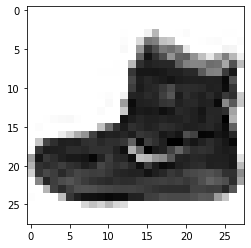

In [ ]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

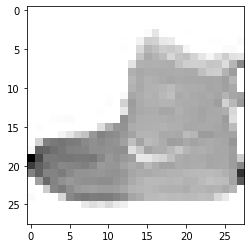

In [ ]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),strides = (1,1),input_shape = (28,28,1),padding='valid'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Dropout(0.2));
# model.add(MaxPooling2D(pool_size=(2,2),padding="same"));

model.add(Conv2D(64,(4,4),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Dropout(0.2));
model.add(MaxPooling2D(pool_size=(2,2)));


model.add(Conv2D(64,(2,2),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Dropout(0.2));
model.add(MaxPooling2D(pool_size=(2,2),padding="same"));

model.add(Conv2D(64,(4,4),strides = (1,1),padding='same'));
model.add(Activation("relu"));
model.add(BatchNormalization());
model.add(Dropout(0.2));
model.add(GlobalAveragePooling2D());

# model.add(Conv2D(64,(3,3),padding='same'));
# model.add(Activation("relu"));
# model.add(GlobalAveragePooling2D(pool_size=(2,2)));


model.add(Flatten());
model.add(Dense(64));
model.add(Activation("relu"))
model.add(BatchNormalization());
model.add(Dropout(0.2));

model.add(Dense(64));
model.add(Activation("relu"))
model.add(BatchNormalization());
model.add(Dropout(0.2));

model.add(Dense(10));
model.add(Activation("softmax"));

filepath = 'best_model.epoch{epoch:02d}-loss{val_accuracy:.2f}.hdf5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=filepath, monitor='val_accuracy',save_best_only=True, mode='auto')
Early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
LR_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2,mode='auto', min_delta=0.001, min_lr=0,)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=32, epochs=15,callbacks=[LR_callback,Early_stopping_callback,checkpoint_callback], validation_split=0.1,validation_data=(X_test,y_test))

# callbacks=[LR_callback,checkpoint_callback,Early_stopping_callback]

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


NameError: ignored

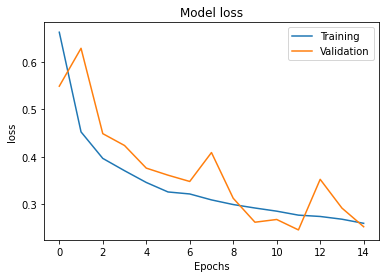

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:

data_aug = ImageDataGenerator(rotation_range=180, width_shift_range=0.01, height_shift_range=0.01,zoom_range=0.6,horizontal_flip=True)
data_aug.fit(X_train)
aug = data_aug.flow(X_train[1:2], batch_size=32)


In [ ]:
  history_data_aug = model.fit(X_train,y_train,batch_size=32, epochs=30,callbacks=[LR_callback,checkpoint_callback], validation_split=0.1,validation_data=(X_test,y_test))

# callbacks=[LR_callback,checkpoint_callback,Early_stopping_callback]

Epoch 1/30
1688/1688 [==============================] - 36s 20ms/step - loss: 0.6041 - accuracy: 0.7865 - val_loss: 0.4097 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 2/30
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3994 - accuracy: 0.8576 - val_loss: 0.3580 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 3/30
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3550 - accuracy: 0.8742 - val_loss: 0.3356 - val_accuracy: 0.8723 - lr: 0.0010
Epoch 4/30
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3218 - accuracy: 0.8843 - val_loss: 0.2965 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 5/30
1688/1688 [==============================] - 33s 19ms/step - loss: 0.3019 - accuracy: 0.8917 - val_loss: 0.2709 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 6/30
1688/1688 [==============================] - 33s 19ms/step - loss: 0.2855 - accuracy: 0.8973 - val_loss: 0.2400 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 7/30
1688/1688 [========================

In [1]:
import pyplot as jkl

ModuleNotFoundError: ignored